# Trabalho 1 de Processamento Digital de Imagens

Universidade Federal de São Carlos - Semestre 2023/1

Professor: Dr. Alexandre Luis Magalhães Levada

Aluna: Leticia Bossatto Marchezi

RA: 791003

## Equalização
Método de equalização do histograma com o intuito de uniformizar a distribuição dos níveis de cinza numa imagem usando a função de distribuição de uma variável aleatória 

Leitura da imagem

In [31]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import cv2

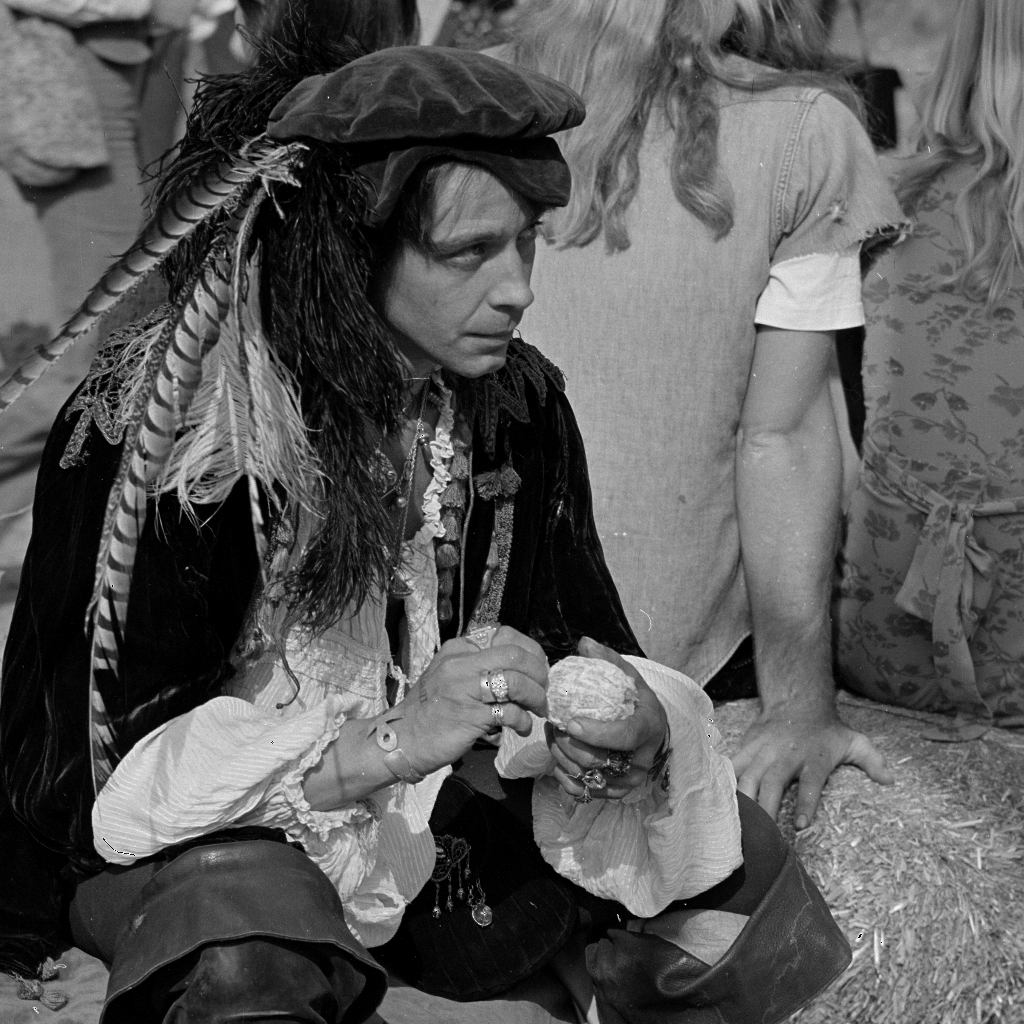

In [32]:
img_content = Image.open("image1.tiff")
img_content

Imagem representada em um array 1024x1024 de inteiros

In [33]:
img_matrix = cv2.imread('image1.tiff',0)
img_matrix

array([[130, 138, 140, ..., 115, 113, 111],
       [139, 134, 131, ..., 110, 117, 116],
       [141, 127, 131, ..., 109, 108, 107],
       ...,
       [102, 103, 103, ...,  76,  80,  89],
       [106, 102, 109, ...,  72,  69,  82],
       [ 98, 105, 116, ...,  85,  81,  89]], dtype=uint8)

Criação do histograma, adotando os valores dos pixels entre 0 e 256

In [34]:
def show_hystogram(img: np.ndarray):
    hist,_ = np.histogram(img.flatten(),256)

    cumulative_df = hist.cumsum()
    
    plt.hist(img.flatten(),256,[0,256], color='g')
    plt.plot(cumulative_df * hist.max()/cumulative_df.max(), color = 'b')
    plt.xlim([0,256])
    plt.legend(('Cumulative Distribution Function','Histogram'), loc='upper right')
    plt.show()

Histograma da imagem original, sem a equalização

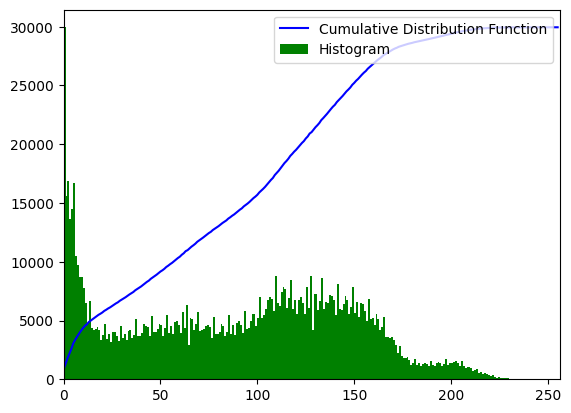

In [35]:
show_hystogram(img_matrix)

Equalização do histograma da imagem linearizando a função de distribuição cumulativa

In [36]:
def normalize_hystogram(img: np.ndarray):
    #Cálculo do histograma
    hist,_ = np.histogram(img_matrix.flatten(),256,[0,256])
    # Normalização do histograma
    hist_norm = hist/len(img_matrix.flatten())
    cumulative_hist = hist_norm.cumsum()
    # Cálculo dos novos valores dos pixels e mapeamento do novo histograma
    new_pixels = np.floor((256-1)*cumulative_hist).astype(int)
    return new_pixels

In [37]:
new_map = normalize_hystogram(img_matrix)

Substituindo as novas intensidades na nova imagem

In [38]:
new_img = []
for i in img_matrix.flatten():
    new_img.append(new_map[i])
new_img = np.reshape(new_img,[1024,1024])
print(new_img)

[[182 195 198 ... 158 154 151]
 [197 189 184 ... 149 161 159]
 [200 178 184 ... 147 145 144]
 ...
 [136 137 137 ... 106 110 120]
 [142 136 147 ... 102  99 113]
 [131 141 159 ... 116 112 120]]


Resultado final na imagem após a equalização:

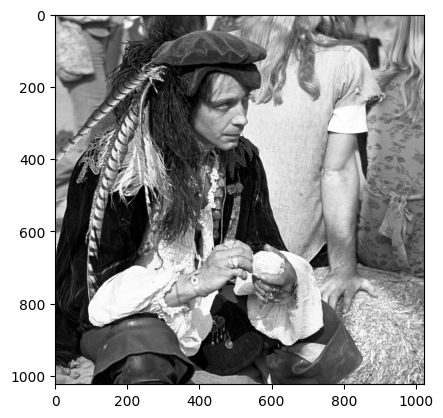

In [39]:
plt.imshow(new_img, cmap="gray")

Histograma da imagem equalizada:

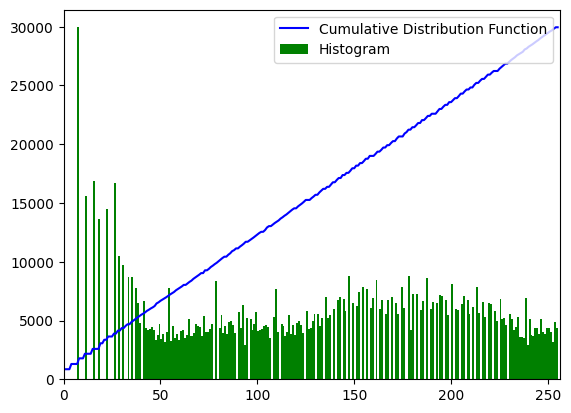

In [40]:
show_hystogram(new_img)

## Binarização
Técnica utilizada para destacar algum objeto desejado do fundo da imagem. A imagem final é segmentada em regiões brancas e pretas, calculadas a partir da variância intraclasse mínima. O algoritmo aplicado nesta técnica é o Limiar de Otsu.

Leitura da imagem

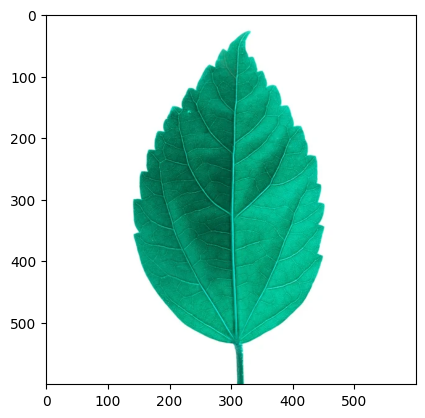

In [41]:
leaf_img = cv2.imread('image2.jpg')
plt.imshow(leaf_img)

Conversão para tons de cinza

In [42]:
leaf_gray = cv2.cvtColor(leaf_img, cv2.COLOR_BGR2GRAY)

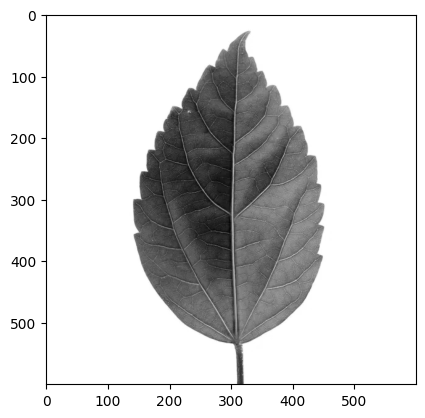

In [43]:
plt.imshow(leaf_gray, cmap="gray")

In [44]:
leaf_gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

Histograma da imagem da folha

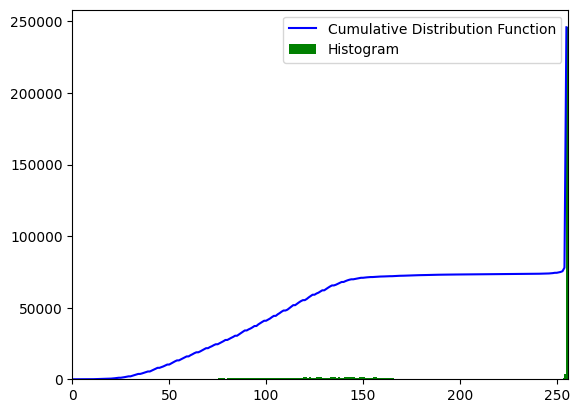

In [45]:
show_hystogram(leaf_gray)

Cálculo das probabilidades da classe 1 e 2, assim como os valores médios delas

In [46]:
def calc_prob(img: np.ndarray, t: int, L:int):
    hist,_ = np.histogram(img.flatten(),256)
    hist_norm = hist/len(img.flatten())
    prob1 = 0
    prob2 = 0
    media1 = 0
    media2 = 0
    for i in range(L):
        if i<t:
            prob1 = prob1 + hist_norm[i]
            media1 = media1 + i
        else:
            prob2 = prob2 + hist_norm[i]
            media2 = media2 + i
    if t:
        media1 = media1/t   
    media2 = media2/(L-t)
    return prob1, prob2, media1, media2

Cálculo da variância intraclasse:

In [47]:
def calc_variance(w1, w2, u1, u2):
    return w1*w2*((u1-u2)**2)

Iteração sobre todos os valores t de possíveis, entre 0 e 256, salvando a variância máxima:

In [48]:
max_variance = 0
best_t = 0
new_leaf = []
for t in range(256):
    prob_1, prob_2, media_1, media_2 = calc_prob(leaf_gray,t,256)
    new_variance = calc_variance(prob_1, prob_2, media_1, media_2)
    if new_variance > max_variance:
        max_variance = new_variance
        best_t = t

Coloração dos pixels. Se o pixel está na classe 1, então será preenchido com 0(preto), se estiver na classe 2, será 255(branco).

In [49]:
def color_binary(img: np.ndarray,t: int,L: int):
    new_img = []
    for i in img.flatten():
        if(i<t):
            new_img.append(0)
        else:
            new_img.append(255)
    new_img = np.reshape(new_img,[len(img),len(img)])
    return new_img

In [50]:
new_leaf = color_binary(leaf_gray,t , 256)

Matrix resultante:

In [51]:
new_leaf

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

Imagem resultante após aplicação do Limiar de Otsu

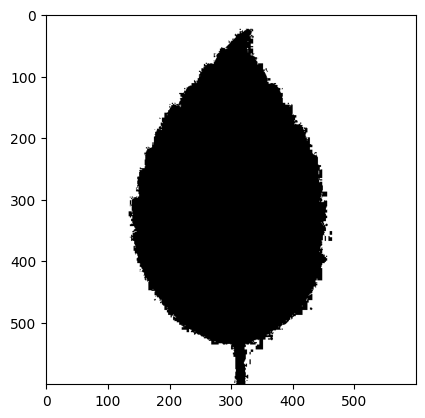

In [52]:
plt.imshow(new_leaf, cmap="gray")